#Atividade de Frequência

*   Implementar em Python o calculo da matriz de covariância dos dados da Iris ou outro dataset.

## 1.   *Importações dos módulos*

    * Aqui serão importados o numpy, pandas, o matplotlib e o seaborn




In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()                         #Configura os plots do matplotlib para terem os mesmos estilos do seaborn
sns.set_style("whitegrid")        #Alterando o estilo do plot para melhor vizualização no colab (Tema escuro fica ruim de ver o fundo)

## 2.  Calculo da matriz de covariância
    *  O dataset Iris será retirado de um repositório do github

In [58]:
iris = pd.read_csv("https://raw.githubusercontent.com/Berawecker/Datasets/main/Iris.csv")
iris.drop(["Id"], axis = 1, inplace = True)

iris

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


    * Cálculo da matriz de covariância

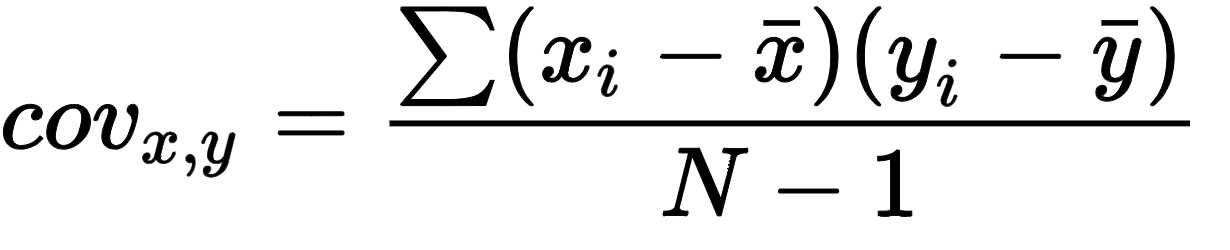

O calculo da matriz de covariancia se dá pela formula:

a = `Σ (x - (media de linha do x)) * (y - (média de linha de y))`

b = `N - 1`

cov = a/b

In [57]:
#Esta função foi criada para retornar o resultado do calculo acima
def covariance(x, y):
  
  media_x = sum(x) / len(x)
  media_y = sum(y) / len(y)

  equacao_x = [(i - media_x)   for i in x]
  equacao_y = [(i - media_y)   for i in y]

  somatorio = sum([(equacao_x[i] * equacao_y[i])   for i in range(len(equacao_x))])
  denominador = len(x) - 1

  return somatorio / denominador

In [53]:
#Criação da matriz de covariância do iris
iris_columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

matrix = np.zeros((len(iris_columns), len(iris_columns)))

for i in range(len(iris_columns)):
  
  for j in range(len(iris_columns)):
    
    matrix[i][j] += round(covariance(iris[iris_columns[i]], iris[iris_columns[j]]), 3)

matrix

array([[ 0.686, -0.039,  1.274,  0.517],
       [-0.039,  0.188, -0.322, -0.118],
       [ 1.274, -0.322,  3.113,  1.296],
       [ 0.517, -0.118,  1.296,  0.582]])

    * Visualização da matrix de covariância

<Figure size 4800x3200 with 0 Axes>

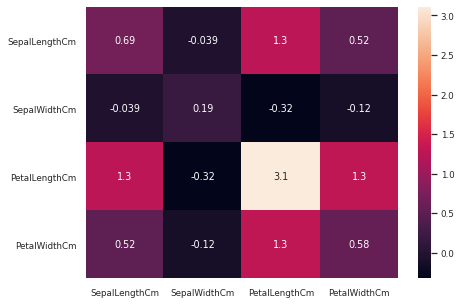

In [56]:
covIris = matrix
plt.figure(dpi = 800)
plt.figure(figsize = (7,5))
sns.set(font_scale = 0.8)
sns.heatmap(covIris, color = 'k', annot = True, xticklabels = iris_columns, yticklabels = iris_columns)